# Recolección de datos electorales en Ecuador año 2006 (1era vuelta)

Empezamos recolectando la información de las elecciones correspondientes al año 2006 de la página oficial del [CNE](http://cne.gob.ec/es/estadisticas/bases-de-datos)

Nos dirigimos a la carpeta de elecciones generales del año 2006, y recopilamos la información necesaria. Una vez descargados los archivos y exportados en formato csv, procedemos a subirlos a nuestro notebook.

## Descargando las bibliotecas necesarias para trabajar y limpiando las tablas

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mp 
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"C:\Users\HP\Documents\GitHub\Proyecto_Datos_Elecciones_Ecuador_2002_2017\2006\1era vuelta")
df_p2006=pd.read_csv('p2006.csv')
df_p2006.head()

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE,CANTON_CODIGO,CANTON_NOMBRE,PARROQUIA_CODIGO,PARROQUIA_NOMBRE,PARROQUIA_ESTADO
0,7,EL ORO,360,ZARUMA,5,ABANIN,RURAL
1,13,MANABI,440,PORTOVIEJO,10,ABDON CALDERON,RURAL
2,1,AZUAY,285,SANTA ISABEL,15,ABDON CALDERON / LA UNION,RURAL
3,6,CHIMBORAZO,215,ALAUSI,20,ACHUPALLAS,RURAL
4,15,NAPO,620,TENA,25,AHUANO,RURAL


In [3]:
df_c2006=pd.read_csv('c2006.csv')
df_c2006.head()

,DIGNIDAD_CODIGO,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_ORDEN,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE,CANDIDATO_SEXO,CANDIDATO_EDAD_EXACTA,CANDIDATO_GRUPOS_DE_EDAD,SUPLENTE_NOMBRE.1,SUPLENTE_SEXO.1,SUPLENTE_EDAD_EXACTA.1,SUPLENTE_GRUPO_DE_EDAD.1,SUPLENTE_NOMBRE.2,SUPLENTE_SEXO.2,SUPLENTE_EDAD_EXACTA.2,SUPLENTE_GRUPO_DE_EDAD.2
0,5,2001,5027600000001,1,2,760,0,JIMENEZ SUAREZ LAURA ELIZABETH,2,34.218579,2,NARANJO MONTERO SEGUNDO MILTON,1,60.608219,3,NaN,,,
1,5,2001,5021750000003,3,2,175,0,GUAMAN BERTHA DEBORA,2,42.813699,2,BRITO FIERRO ANGEL GABRIEL,1,55.109589,3,NaN,,,
2,5,6,5178960000012,3,17,896,0,FARES FARES MARIURI ELENA,2,37.249315,2,BAQUE FLORES LUIS EFREN,1,43.736986,2,NaN,,,
3,3,9002,3090000000106,4,9,0,0,MONAR VELEZ GLADYS VANESSA,2,27.701370,1,CHILA PLASENCIA AURELIO JUSTINO,1,50.322404,3,NaN,,,
4,5,5,5094100000021,1,9,410,0,VERA VILLAO ROBERTO MARTIN,1,45.926230,3,GUILLEN VASQUEZ EDISON NICOLAS,1,41.372603,2,NaN,,,


In [4]:
df_1V2006=pd.read_csv('1V2006.csv', low_memory=False)
df_1V2006.head()

,DIGNIDAD_CODIGO,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,SEXO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,OP_VOTOS_EN_PLANCHA,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO
0,1,1,260,285,1,25,191,496,1,0,1000000000002,12,#NULL!
1,1,1,260,285,1,25,191,496,4,0,1000000000003,181,#NULL!
2,1,1,260,285,1,25,191,496,5,0,1000000000004,586,#NULL!
3,1,1,260,285,1,25,191,496,6,0,1000000000005,34,#NULL!
4,1,1,260,285,1,25,191,496,8,0,1000000000008,23,#NULL!


Antes de nada, procedemos a limpiar la tabla de candidatos. Analizamos sus columnas primero.

In [5]:
df_c2006.dtypes

DIGNIDAD_CODIGO                 int64
OP_CODIGO                       int64
CANDIDATO_CODIGO                int64
CANDIDATO_ORDEN                 int64
CANDIDATO_PROVINCIA_CODIGO      int64
CANDIDATO_CANTON_CODIGO         int64
CANDIDATO_PARROQUIA_CODIGO      int64
CANDIDATO_NOMBRE               object
CANDIDATO_SEXO                  int64
CANDIDATO_EDAD_EXACTA         float64
CANDIDATO_GRUPOS_DE_EDAD        int64
SUPLENTE_NOMBRE.1              object
SUPLENTE_SEXO.1                 int64
SUPLENTE_EDAD_EXACTA.1        float64
SUPLENTE_GRUPO_DE_EDAD.1        int64
SUPLENTE_NOMBRE.2              object
SUPLENTE_SEXO.2                object
SUPLENTE_EDAD_EXACTA.2         object
SUPLENTE_GRUPO_DE_EDAD.2       object
dtype: object

In [6]:
df_c2006=df_c2006.drop(['SUPLENTE_NOMBRE.1','CANDIDATO_GRUPOS_DE_EDAD','CANDIDATO_EDAD_EXACTA','CANDIDATO_SEXO','SUPLENTE_SEXO.1','SUPLENTE_EDAD_EXACTA.1'],axis=1)
df_c2006=df_c2006.drop(['SUPLENTE_GRUPO_DE_EDAD.1','SUPLENTE_NOMBRE.2','SUPLENTE_SEXO.2','SUPLENTE_EDAD_EXACTA.2','SUPLENTE_GRUPO_DE_EDAD.2','OP_CODIGO'],axis=1)
df_c2006.head()

,DIGNIDAD_CODIGO,CANDIDATO_CODIGO,CANDIDATO_ORDEN,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE
0,5,5027600000001,1,2,760,0,JIMENEZ SUAREZ LAURA ELIZABETH
1,5,5021750000003,3,2,175,0,GUAMAN BERTHA DEBORA
2,5,5178960000012,3,17,896,0,FARES FARES MARIURI ELENA
3,3,3090000000106,4,9,0,0,MONAR VELEZ GLADYS VANESSA
4,5,5094100000021,1,9,410,0,VERA VILLAO ROBERTO MARTIN


In [7]:
df_c2006.dtypes

DIGNIDAD_CODIGO                int64
CANDIDATO_CODIGO               int64
CANDIDATO_ORDEN                int64
CANDIDATO_PROVINCIA_CODIGO     int64
CANDIDATO_CANTON_CODIGO        int64
CANDIDATO_PARROQUIA_CODIGO     int64
CANDIDATO_NOMBRE              object
dtype: object

De la tabla de resultados, también eliminamos las columnas sin importancia.

In [8]:
df_1V2006.dtypes

DIGNIDAD_CODIGO         int64
PROVINCIA_CODIGO        int64
CANTON_CODIGO           int64
PARROQUIA_CODIGO        int64
SEXO                    int64
NUMERO_DE_ACTAS         int64
VOTOS_EN_BLANCO         int64
VOTOS_NULOS             int64
OP_CODIGO               int64
OP_VOTOS_EN_PLANCHA     int64
CANDIDATO_CODIGO        int64
CANDIDATO_VOTOS        object
CANDIDATO_ESTADO       object
dtype: object

In [9]:
df_1V2006=df_1V2006.drop(['OP_VOTOS_EN_PLANCHA','SEXO','NUMERO_DE_ACTAS'], axis=1)
df_1V2006.head()

,DIGNIDAD_CODIGO,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO
0,1,1,260,285,191,496,1,1000000000002,12,#NULL!
1,1,1,260,285,191,496,4,1000000000003,181,#NULL!
2,1,1,260,285,191,496,5,1000000000004,586,#NULL!
3,1,1,260,285,191,496,6,1000000000005,34,#NULL!
4,1,1,260,285,191,496,8,1000000000008,23,#NULL!


Una vez reducidas la cantidad de columnas, verificamos la probabilidad de datos duplicados en nuestra tabla.

In [10]:
df_1V2006.count()

DIGNIDAD_CODIGO     585745
PROVINCIA_CODIGO    585745
CANTON_CODIGO       585745
PARROQUIA_CODIGO    585745
VOTOS_EN_BLANCO     585745
VOTOS_NULOS         585745
OP_CODIGO           585745
CANDIDATO_CODIGO    585745
CANDIDATO_VOTOS     585745
CANDIDATO_ESTADO    585745
dtype: int64

Por lo visto no existen filas duplicadas, por lo que continuamos con nuestra depuración. Una vez eliminadas las filas duplicadas, revisamos si existan filas que posean datos nulos. Utilizamos el siguiente código.

In [11]:
print(df_1V2006.isnull().sum())

DIGNIDAD_CODIGO     0
PROVINCIA_CODIGO    0
CANTON_CODIGO       0
PARROQUIA_CODIGO    0
VOTOS_EN_BLANCO     0
VOTOS_NULOS         0
OP_CODIGO           0
CANDIDATO_CODIGO    0
CANDIDATO_VOTOS     0
CANDIDATO_ESTADO    0
dtype: int64


Por lo visto no existen datos nulos, por lo que continuamos con el arreglo de nuestras tablas de información.

## Agrupación de datos por candidato

Antes de contar votos por candidato, procedemos a unir las tablas necesarias. Para eliminar inconsistencias de la columna de candidatos, cambiamos el nombre de la columna codigo candidato. Comenzamos uniendo las tablas correspondientes

In [12]:
df_c2006.rename(columns={'CANDIDATO_CODIGO':'CODIGO'}, inplace=True)
df_c2006.head()

,DIGNIDAD_CODIGO,CODIGO,CANDIDATO_ORDEN,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE
0,5,5027600000001,1,2,760,0,JIMENEZ SUAREZ LAURA ELIZABETH
1,5,5021750000003,3,2,175,0,GUAMAN BERTHA DEBORA
2,5,5178960000012,3,17,896,0,FARES FARES MARIURI ELENA
3,3,3090000000106,4,9,0,0,MONAR VELEZ GLADYS VANESSA
4,5,5094100000021,1,9,410,0,VERA VILLAO ROBERTO MARTIN


Ordenamos nuestra tabla por codigo

In [13]:
df_c2006.sort_values(['DIGNIDAD_CODIGO'], ascending=True, inplace=True)
df_c2006=df_c2006.head(13)
df_c2006

,DIGNIDAD_CODIGO,CODIGO,CANDIDATO_ORDEN,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE
2332,1,1000000000003,1,0,0,0,VITERI JIMENEZ CYNTHIA FERNANDA
1198,1,1000000000011,1,0,0,0,PROAÑO MAYA MARCO ANTONIO
957,1,1000000000007,1,0,0,0,SAGNAY DE LA BASTIDA CARLOS FRANCISCO
5047,1,1000000000012,1,0,0,0,CORREA DELGADO RAFAEL VICENTE
4989,1,1000000000013,1,0,0,0,LARREA CABRERA MARCELO
1124,1,1000000000008,1,0,0,0,VILLACIS MALDONADO LUIS ALFREDO
5693,1,1000000000010,1,0,0,0,TORRES PASTOR LENIN GALO ARTURO
7410,1,1000000000004,1,0,0,0,NOBOA PONTON ALVARO FERNANDO
2580,1,1000000000001,1,0,0,0,GUTIERREZ BORBUA FAUSTO GILMAR
6863,1,1000000000009,1,0,0,0,MACAS AMBULUDI LUIS ALBERTO


In [14]:
df_rp=pd.merge(left=df_1V2006, right=df_c2006, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_rp=df_rp.drop(['CANDIDATO_ESTADO','DIGNIDAD_CODIGO_y'], axis=1)
df_rp=df_rp.dropna()
df_rp

,DIGNIDAD_CODIGO_x,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CODIGO,CANDIDATO_ORDEN,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE
0,1,1,260,285,191,496,1,1000000000002,12,1.000000e+12,1.0,0.0,0.0,0.0,DAMERVAL MARTINEZ JAIME FRANCISCO
1,1,1,260,285,191,496,4,1000000000003,181,1.000000e+12,1.0,0.0,0.0,0.0,VITERI JIMENEZ CYNTHIA FERNANDA
2,1,1,260,285,191,496,5,1000000000004,586,1.000000e+12,1.0,0.0,0.0,0.0,NOBOA PONTON ALVARO FERNANDO
3,1,1,260,285,191,496,6,1000000000005,34,1.000000e+12,1.0,0.0,0.0,0.0,ROSERO GONZALEZ JOSE FERNANDO
4,1,1,260,285,191,496,8,1000000000008,23,1.000000e+12,1.0,0.0,0.0,0.0,VILLACIS MALDONADO LUIS ALFREDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32248,1,25,431,9065,0,0,48,1000000000001,0,1.000000e+12,1.0,0.0,0.0,0.0,GUTIERREZ BORBUA FAUSTO GILMAR
32249,1,25,431,9065,0,0,55,1000000000011,0,1.000000e+12,1.0,0.0,0.0,0.0,PROAÑO MAYA MARCO ANTONIO
32250,1,25,431,9065,0,0,62,1000000000013,1,1.000000e+12,1.0,0.0,0.0,0.0,LARREA CABRERA MARCELO
32251,1,25,431,9065,0,0,71,1000000000006,0,1.000000e+12,1.0,0.0,0.0,0.0,ROLDOS AGUILERA LEON EUSEBIO


In [15]:
df_rp.rename(columns={'CANDIDATO_VOTOS':'VOTOS'}, inplace=True)
df_rp.head()

,DIGNIDAD_CODIGO_x,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,VOTOS,CODIGO,CANDIDATO_ORDEN,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE
0,1,1,260,285,191,496,1,1000000000002,12,1.000000e+12,1.0,0.0,0.0,0.0,DAMERVAL MARTINEZ JAIME FRANCISCO
1,1,1,260,285,191,496,4,1000000000003,181,1.000000e+12,1.0,0.0,0.0,0.0,VITERI JIMENEZ CYNTHIA FERNANDA
2,1,1,260,285,191,496,5,1000000000004,586,1.000000e+12,1.0,0.0,0.0,0.0,NOBOA PONTON ALVARO FERNANDO
3,1,1,260,285,191,496,6,1000000000005,34,1.000000e+12,1.0,0.0,0.0,0.0,ROSERO GONZALEZ JOSE FERNANDO
4,1,1,260,285,191,496,8,1000000000008,23,1.000000e+12,1.0,0.0,0.0,0.0,VILLACIS MALDONADO LUIS ALFREDO


La tabla se ve mucho mejor, por lo que ahora agrupamos los votos por candidato.

In [16]:
df_rp['VOTOS']=df_rp['VOTOS'].astype('int')
df_rp.dtypes

DIGNIDAD_CODIGO_x               int64
PROVINCIA_CODIGO                int64
CANTON_CODIGO                   int64
PARROQUIA_CODIGO                int64
VOTOS_EN_BLANCO                 int64
VOTOS_NULOS                     int64
OP_CODIGO                       int64
CANDIDATO_CODIGO                int64
VOTOS                           int32
CODIGO                        float64
CANDIDATO_ORDEN               float64
CANDIDATO_PROVINCIA_CODIGO    float64
CANDIDATO_CANTON_CODIGO       float64
CANDIDATO_PARROQUIA_CODIGO    float64
CANDIDATO_NOMBRE               object
dtype: object

In [17]:
df_r=df_rp.groupby(['CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','VOTOS'].sum()
df_r

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VOTOS_EN_BLANCO,VOTOS_NULOS,VOTOS
CANDIDATO_NOMBRE,,,
CORREA DELGADO RAFAEL VICENTE,316376,775694,1246333
DAMERVAL MARTINEZ JAIME FRANCISCO,316376,775694,25284
GUTIERREZ BORBUA FAUSTO GILMAR,316376,775694,950895
LARREA CABRERA MARCELO,316376,775694,23233
MACAS AMBULUDI LUIS ALBERTO,316376,775694,119577
NOBOA PONTON ALVARO FERNANDO,316376,775694,1464251
PROAÑO MAYA MARCO ANTONIO,316376,775694,77655
ROLDOS AGUILERA LEON EUSEBIO,316376,775694,809754
ROSERO GONZALEZ JOSE FERNANDO,316376,775694,113323


Realizamos un gráfico de pastel para poder visibilizar mejor la información.

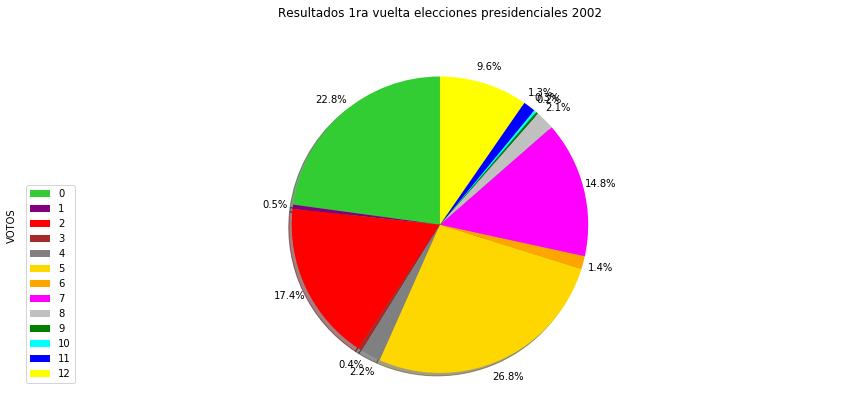

In [18]:
Colores= ['limegreen','purple','red','brown','grey','gold','orange','magenta','silver','green','cyan','blue','yellow']

df_r['VOTOS'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            colors=Colores,
                            pctdistance=1.12,
                            )

# Título del gráfico
plt.title('Resultados 1ra vuelta elecciones presidenciales 2002', y=1.12) 

plt.axis('equal') 

# Añadir leyenda
plt.legend(labels=df_rp.index, loc='lower left') 

plt.show()

Procedemos a exportar la información 

In [19]:
df_r.to_excel('Resultados V1 2006.xlsx', sheet_name='Resultados 1V')
print('exportación exitosa')
del df_r

exportación exitosa


## Agrupación de datos por provincia

Procedemos nuevamente a unir las tablas correspondientes para poder aislar los datos que necesitamos.

In [20]:
df_prov=df_p2006.drop(['CANTON_CODIGO','CANTON_NOMBRE','PARROQUIA_CODIGO','PARROQUIA_NOMBRE','PARROQUIA_ESTADO'], axis=1)
df_prov.head()

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE
0,7,EL ORO
1,13,MANABI
2,1,AZUAY
3,6,CHIMBORAZO
4,15,NAPO


In [21]:
df_p=pd.merge(left=df_rp, right=df_prov, how='left', left_on='PROVINCIA_CODIGO', right_on='PROVINCIA_CODIGO')
df_p.head()

,DIGNIDAD_CODIGO_x,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,VOTOS,CODIGO,CANDIDATO_ORDEN,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE,PROVINCIA_NOMBRE
0,1,1,260,285,191,496,1,1000000000002,12,1.000000e+12,1.0,0.0,0.0,0.0,DAMERVAL MARTINEZ JAIME FRANCISCO,AZUAY
1,1,1,260,285,191,496,1,1000000000002,12,1.000000e+12,1.0,0.0,0.0,0.0,DAMERVAL MARTINEZ JAIME FRANCISCO,AZUAY
2,1,1,260,285,191,496,1,1000000000002,12,1.000000e+12,1.0,0.0,0.0,0.0,DAMERVAL MARTINEZ JAIME FRANCISCO,AZUAY
3,1,1,260,285,191,496,1,1000000000002,12,1.000000e+12,1.0,0.0,0.0,0.0,DAMERVAL MARTINEZ JAIME FRANCISCO,AZUAY
4,1,1,260,285,191,496,1,1000000000002,12,1.000000e+12,1.0,0.0,0.0,0.0,DAMERVAL MARTINEZ JAIME FRANCISCO,AZUAY


In [23]:
df_prov1=df_p.groupby(['PROVINCIA_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','VOTOS'].sum()
df_prov1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  \
PROVINCIA_NOMBRE CANDIDATO_NOMBRE                                         
AZUAY            CORREA DELGADO RAFAEL VICENTE                  1314632   
                 DAMERVAL MARTINEZ JAIME FRANCISCO              1314632   
                 GUTIERREZ BORBUA FAUSTO GILMAR                 1314632   
                 LARREA CABRERA MARCELO                         1314632   
                 MACAS AMBULUDI LUIS ALBERTO                    1314632   
...                                                                 ...   
ZAMORA CHINCHIPE ROSERO GONZALEZ JOSE FERNANDO                    64634   
                 SAGNAY DE LA BASTIDA CARLOS FRANCISCO            64634   
                 TORRES PASTOR LENIN GALO ARTURO                  64634   
                 VILLACIS MALDONADO LUIS ALFREDO                  64634   
                 VITERI JIMENEZ CYNTHIA FERNANDA                  64634   

                                                        VOTOS_NULOS    VOTOS  
PROVINCIA_NOMBRE CANDIDATO_NOMBRE                                             
AZUAY            CORREA DELGADO RAFAEL VICENTE              3674264  7327056  
                 DAMERVAL MARTINEZ JAIME FRANCISCO          3674264    63184  
                 GUTIERREZ BORBUA FAUSTO GILMAR             3674264  3646456  
                 LARREA CABRERA MARCELO                     3674264   163240  
                 MACAS AMBULUDI LUIS ALBERTO                3674264   553784  
...                                                             ...      ...  
ZAMORA CHINCHIPE ROSERO GONZALEZ JOSE FERNANDO               131580     5474  
                 SAGNAY DE LA BASTIDA CARLOS FRANCISCO       131580     1530  
                 TORRES PASTOR LENIN GALO ARTURO             131580     1632  
                 VILLACIS MALDONADO LUIS ALFREDO             131580    16694  
                 VITERI JIMENEZ CYNTHIA FERNANDA             131580    69530  

[299 rows x 3 columns]

Para poder visualizar mejor la información, procedemos a realizar un gráfico de barras con la tabla obtenida

In [24]:
df_prov2=df_prov1['VOTOS']
df_prov2=df_prov1.unstack(level=[1])

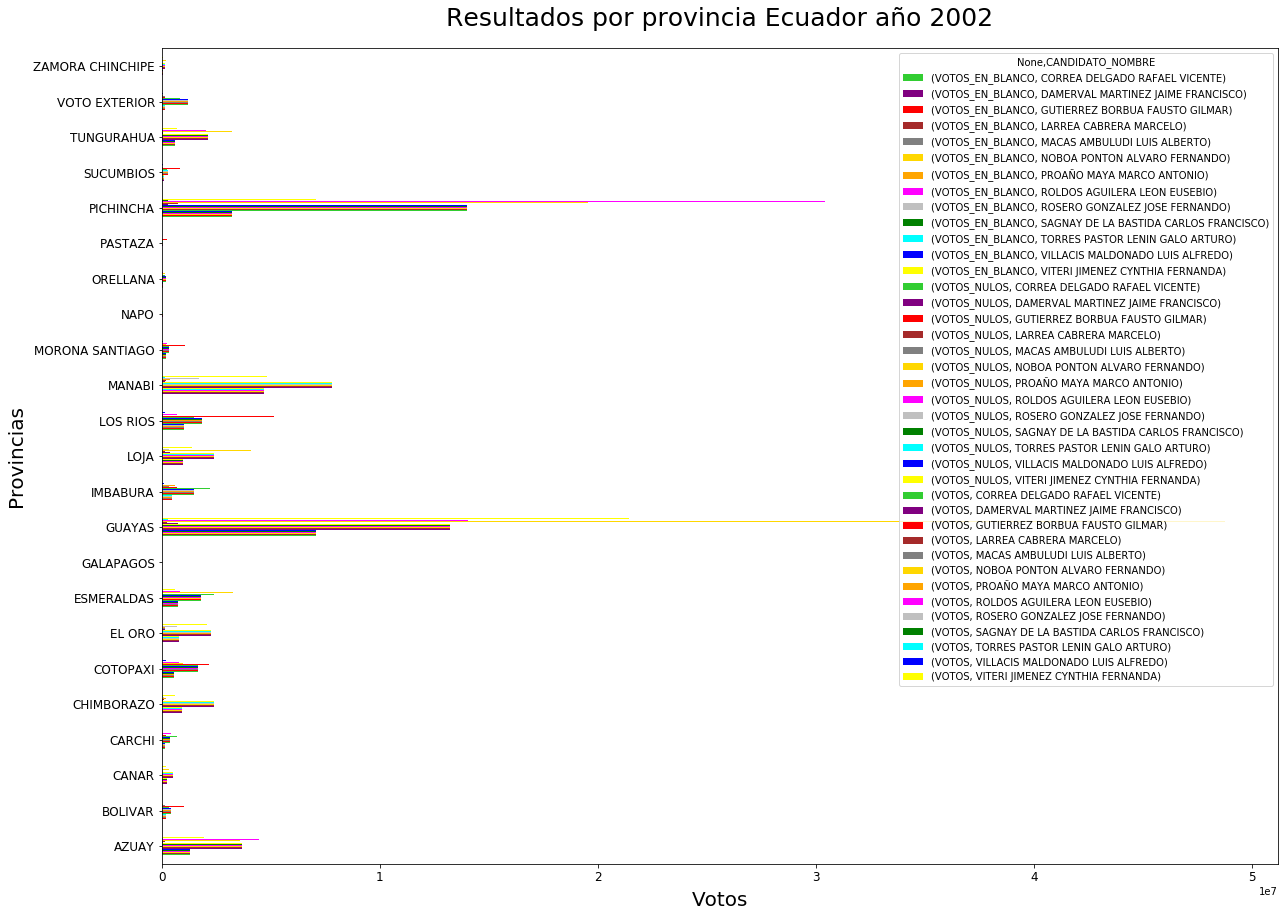

In [25]:
df_prov2.plot(kind='barh', figsize=(20,15), label=None, color=Colores)

plt.xlabel('Votos', fontsize=20, labelpad= 7)
plt.ylabel('Provincias', fontsize=20, labelpad= 7)
plt.title('Resultados por provincia Ecuador año 2002', fontsize=25, y=1.02)
plt.tick_params(labelsize=12)

plt.show()

In [26]:
df_prov1.to_excel('Resultados V1 provinciales 2006.xlsx', sheet_name='Resultados 1V')
print('exportación exitosa')
del df_prov1
del df_prov2

exportación exitosa


## Agrupando los votos por canton

Nuevamente nos centramos en reunir la información en una sola tabla, esta vez voy a organizar los votos por cantón. Vamos a utilizar la misma tabla unificada, pero esta vez vamos a agrupar la información por cantón y nombre de candidato.

In [28]:
df_cant=df_p2006.drop(['PROVINCIA_CODIGO','PROVINCIA_NOMBRE','PARROQUIA_CODIGO','PARROQUIA_NOMBRE','PARROQUIA_ESTADO'], axis=1)
df_cant.head()

,CANTON_CODIGO,CANTON_NOMBRE
0,360,ZARUMA
1,440,PORTOVIEJO
2,285,SANTA ISABEL
3,215,ALAUSI
4,620,TENA


In [29]:
df_p=pd.merge(left=df_rp, right=df_cant, how='left', left_on='CANTON_CODIGO', right_on='CANTON_CODIGO')
df_p.head()

,DIGNIDAD_CODIGO_x,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,VOTOS,CODIGO,CANDIDATO_ORDEN,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE,CANTON_NOMBRE
0,1,1,260,285,191,496,1,1000000000002,12,1.000000e+12,1.0,0.0,0.0,0.0,DAMERVAL MARTINEZ JAIME FRANCISCO,CUENCA
1,1,1,260,285,191,496,1,1000000000002,12,1.000000e+12,1.0,0.0,0.0,0.0,DAMERVAL MARTINEZ JAIME FRANCISCO,CUENCA
2,1,1,260,285,191,496,1,1000000000002,12,1.000000e+12,1.0,0.0,0.0,0.0,DAMERVAL MARTINEZ JAIME FRANCISCO,CUENCA
3,1,1,260,285,191,496,1,1000000000002,12,1.000000e+12,1.0,0.0,0.0,0.0,DAMERVAL MARTINEZ JAIME FRANCISCO,CUENCA
4,1,1,260,285,191,496,1,1000000000002,12,1.000000e+12,1.0,0.0,0.0,0.0,DAMERVAL MARTINEZ JAIME FRANCISCO,CUENCA


In [30]:
df_cant1=df_p.groupby(['CANTON_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','VOTOS'].sum()
df_cant1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  \
CANTON_NOMBRE CANDIDATO_NOMBRE                                         
24 DE MAYO    CORREA DELGADO RAFAEL VICENTE                     7732   
              DAMERVAL MARTINEZ JAIME FRANCISCO                 7732   
              GUTIERREZ BORBUA FAUSTO GILMAR                    7732   
              LARREA CABRERA MARCELO                            7732   
              MACAS AMBULUDI LUIS ALBERTO                       7732   
...                                                              ...   
ZARUMA        ROSERO GONZALEZ JOSE FERNANDO                     5840   
              SAGNAY DE LA BASTIDA CARLOS FRANCISCO             5840   
              TORRES PASTOR LENIN GALO ARTURO                   5840   
              VILLACIS MALDONADO LUIS ALFREDO                   5840   
              VITERI JIMENEZ CYNTHIA FERNANDA                   5840   

                                                     VOTOS_NULOS  VOTOS  
CANTON_NOMBRE CANDIDATO_NOMBRE                                           
24 DE MAYO    CORREA DELGADO RAFAEL VICENTE                10616   7216  
              DAMERVAL MARTINEZ JAIME FRANCISCO            10616    188  
              GUTIERREZ BORBUA FAUSTO GILMAR               10616   8364  
              LARREA CABRERA MARCELO                       10616    436  
              MACAS AMBULUDI LUIS ALBERTO                  10616    396  
...                                                          ...    ...  
ZARUMA        ROSERO GONZALEZ JOSE FERNANDO                16170   2760  
              SAGNAY DE LA BASTIDA CARLOS FRANCISCO        16170    230  
              TORRES PASTOR LENIN GALO ARTURO              16170    280  
              VILLACIS MALDONADO LUIS ALFREDO              16170   2080  
              VITERI JIMENEZ CYNTHIA FERNANDA              16170  12340  

[3367 rows x 3 columns]

In [31]:
df_cant1.to_excel('Resultados V1 cantonales 2006.xlsx', sheet_name='Resultados 1V')
print('exportación exitosa')
del df_cant1

exportación exitosa


### Agrupando los votos por parroquia

Finalmente, hacemos lo mismo pero por parroquia. 

In [40]:
df_parr=df_p2006.drop(['PROVINCIA_CODIGO','PROVINCIA_NOMBRE','CANTON_CODIGO','CANTON_NOMBRE','PARROQUIA_ESTADO'], axis=1)
df_parr.head()

,PARROQUIA_CODIGO,PARROQUIA_NOMBRE
0,5,ABANIN
1,10,ABDON CALDERON
2,15,ABDON CALDERON / LA UNION
3,20,ACHUPALLAS
4,25,AHUANO


In [41]:
df_p=pd.merge(left=df_rp, right=df_parr, how='left', left_on='PARROQUIA_CODIGO', right_on='PARROQUIA_CODIGO')
df_p.head()

,DIGNIDAD_CODIGO_x,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,VOTOS,CODIGO,CANDIDATO_ORDEN,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE,PARROQUIA_NOMBRE
0,1,1,260,285,191,496,1,1000000000002,12,1.000000e+12,1.0,0.0,0.0,0.0,DAMERVAL MARTINEZ JAIME FRANCISCO,BANOS
1,1,1,260,285,191,496,4,1000000000003,181,1.000000e+12,1.0,0.0,0.0,0.0,VITERI JIMENEZ CYNTHIA FERNANDA,BANOS
2,1,1,260,285,191,496,5,1000000000004,586,1.000000e+12,1.0,0.0,0.0,0.0,NOBOA PONTON ALVARO FERNANDO,BANOS
3,1,1,260,285,191,496,6,1000000000005,34,1.000000e+12,1.0,0.0,0.0,0.0,ROSERO GONZALEZ JOSE FERNANDO,BANOS
4,1,1,260,285,191,496,8,1000000000008,23,1.000000e+12,1.0,0.0,0.0,0.0,VILLACIS MALDONADO LUIS ALFREDO,BANOS


In [42]:
df_parr=df_p.groupby(['PARROQUIA_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','VOTOS'].sum()
df_parr.head(16)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  \
PARROQUIA_NOMBRE CANDIDATO_NOMBRE                                         
10 DE AGOSTO     CORREA DELGADO RAFAEL VICENTE                      309   
                 DAMERVAL MARTINEZ JAIME FRANCISCO                  309   
                 GUTIERREZ BORBUA FAUSTO GILMAR                     309   
                 LARREA CABRERA MARCELO                             309   
                 MACAS AMBULUDI LUIS ALBERTO                        309   
                 NOBOA PONTON ALVARO FERNANDO                       309   
                 PROAÑO MAYA MARCO ANTONIO                          309   
                 ROLDOS AGUILERA LEON EUSEBIO                       309   
                 ROSERO GONZALEZ JOSE FERNANDO                      309   
                 SAGNAY DE LA BASTIDA CARLOS FRANCISCO              309   
                 TORRES PASTOR LENIN GALO ARTURO                    309   
                 VILLACIS MALDONADO LUIS ALFREDO                    309   
                 VITERI JIMENEZ CYNTHIA FERNANDA                    309   
11 DE NOVIEMBRE  CORREA DELGADO RAFAEL VICENTE                       47   
                 DAMERVAL MARTINEZ JAIME FRANCISCO                   47   
                 GUTIERREZ BORBUA FAUSTO GILMAR                      47   

                                                        VOTOS_NULOS  VOTOS  
PARROQUIA_NOMBRE CANDIDATO_NOMBRE                                           
10 DE AGOSTO     CORREA DELGADO RAFAEL VICENTE                  442    158  
                 DAMERVAL MARTINEZ JAIME FRANCISCO              442      6  
                 GUTIERREZ BORBUA FAUSTO GILMAR                 442    444  
                 LARREA CABRERA MARCELO                         442      3  
                 MACAS AMBULUDI LUIS ALBERTO                    442     16  
                 NOBOA PONTON ALVARO FERNANDO                   442    623  
                 PROAÑO MAYA MARCO ANTONIO                      442     23  
                 ROLDOS AGUILERA LEON EUSEBIO                   442     77  
                 ROSERO GONZALEZ JOSE FERNANDO                  442     64  
                 SAGNAY DE LA BASTIDA CARLOS FRANCISCO          442     10  
                 TORRES PASTOR LENIN GALO ARTURO                442     13  
                 VILLACIS MALDONADO LUIS ALFREDO                442     13  
                 VITERI JIMENEZ CYNTHIA FERNANDA                442    300  
11 DE NOVIEMBRE  CORREA DELGADO RAFAEL VICENTE                  164    321  
                 DAMERVAL MARTINEZ JAIME FRANCISCO              164      1  
                 GUTIERREZ BORBUA FAUSTO GILMAR                 164    319

Comprobamos la información usando la parroquia TARQUI. 

In [43]:
df_parr.loc['TARQUI']

,VOTOS_EN_BLANCO,VOTOS_NULOS,VOTOS
CANDIDATO_NOMBRE,,,
CORREA DELGADO RAFAEL VICENTE,9202,26028,60244
DAMERVAL MARTINEZ JAIME FRANCISCO,9202,26028,1731
GUTIERREZ BORBUA FAUSTO GILMAR,9202,26028,18491
LARREA CABRERA MARCELO,9202,26028,694
MACAS AMBULUDI LUIS ALBERTO,9202,26028,1232
NOBOA PONTON ALVARO FERNANDO,9202,26028,102045
PROAÑO MAYA MARCO ANTONIO,9202,26028,1929
ROLDOS AGUILERA LEON EUSEBIO,9202,26028,41753
ROSERO GONZALEZ JOSE FERNANDO,9202,26028,6240


In [44]:
df_parr.to_excel('Resultados V1 parroquiales 2006.xlsx', sheet_name='Resultados 1V')
print('exportación exitosa')
del df_parr

exportación exitosa
